출처: https://tobigs.gitbook.io/tobigs/data-analysis/untitled-1#5-feature

In [2]:
!unzip data03.zip

Archive:  data03.zip
replace Auction_master_en.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Auction_master_kr.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
!unzip Auction_master_kr.zip

Archive:  Auction_master_kr.zip
  inflating: Auction_rent.csv        
   creating: __MACOSX/
  inflating: __MACOSX/._Auction_rent.csv  
  inflating: Auction_submission.csv  
  inflating: __MACOSX/._Auction_submission.csv  
  inflating: Auction_master_test.csv  
  inflating: __MACOSX/._Auction_master_test.csv  
  inflating: Auction_master_train.csv  
  inflating: __MACOSX/._Auction_master_train.csv  
  inflating: Auction_regist.csv      
  inflating: __MACOSX/._Auction_regist.csv  
  inflating: Auction_result.csv      
  inflating: __MACOSX/._Auction_result.csv  


In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [143]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,236 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 145483 files and d

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

import matplotlib as mpl
# 고해상도 Plot을 위해 DPI 조절
mpl.rcParams['figure.dpi']= 150

In [5]:
Auction_master_test=pd.read_csv("Auction_master_test.csv")
Auction_master_train=pd.read_csv("Auction_master_train.csv")
Auction_regist=pd.read_csv("Auction_regist.csv")
Auction_rent=pd.read_csv("Auction_rent.csv")
Auction_result=pd.read_csv("Auction_result.csv")
Auction_submission=pd.read_csv("Auction_submission.csv")


In [6]:
Auction_master_train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

In [7]:
Auction_master_train.isna().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [8]:
train_auction=Auction_master_train.dropna(axis=1)
test_auction=Auction_master_test.dropna(axis=1)

In [9]:
train_auction.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_san', 'addr_etc', 'Apartment_usage',
       'Preserve_regist_date', 'Total_floor', 'Current_floor',
       'Share_auction_YorN', 'road_name', 'Close_date', 'Close_result',
       'point.y', 'point.x', 'Hammer_price'],
      dtype='object')

In [10]:
train_auction[train_auction.columns[train_auction.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
Auction_class,1933,2,임의,1439
Bid_class,1933,3,일반,1796
Appraisal_company,1933,238,자연감정,33
Appraisal_date,1933,712,2015-08-28 00:00:00,29
First_auction_date,1933,498,2016-04-26 00:00:00,29
Final_auction_date,1933,405,2016-04-26 00:00:00,19
Final_result,1933,1,낙찰,1933
Creditor,1933,448,Private,483
addr_do,1933,2,서울,1242
addr_si,1933,39,노원구,129



##Hammer_price 와 상관관계가 높은 열 집중, 상관관계가 높은 feature은 삭제
*   total_land_auction_area 삭제 필요해보임
*   total_land_real_area 삭제 필요해보임


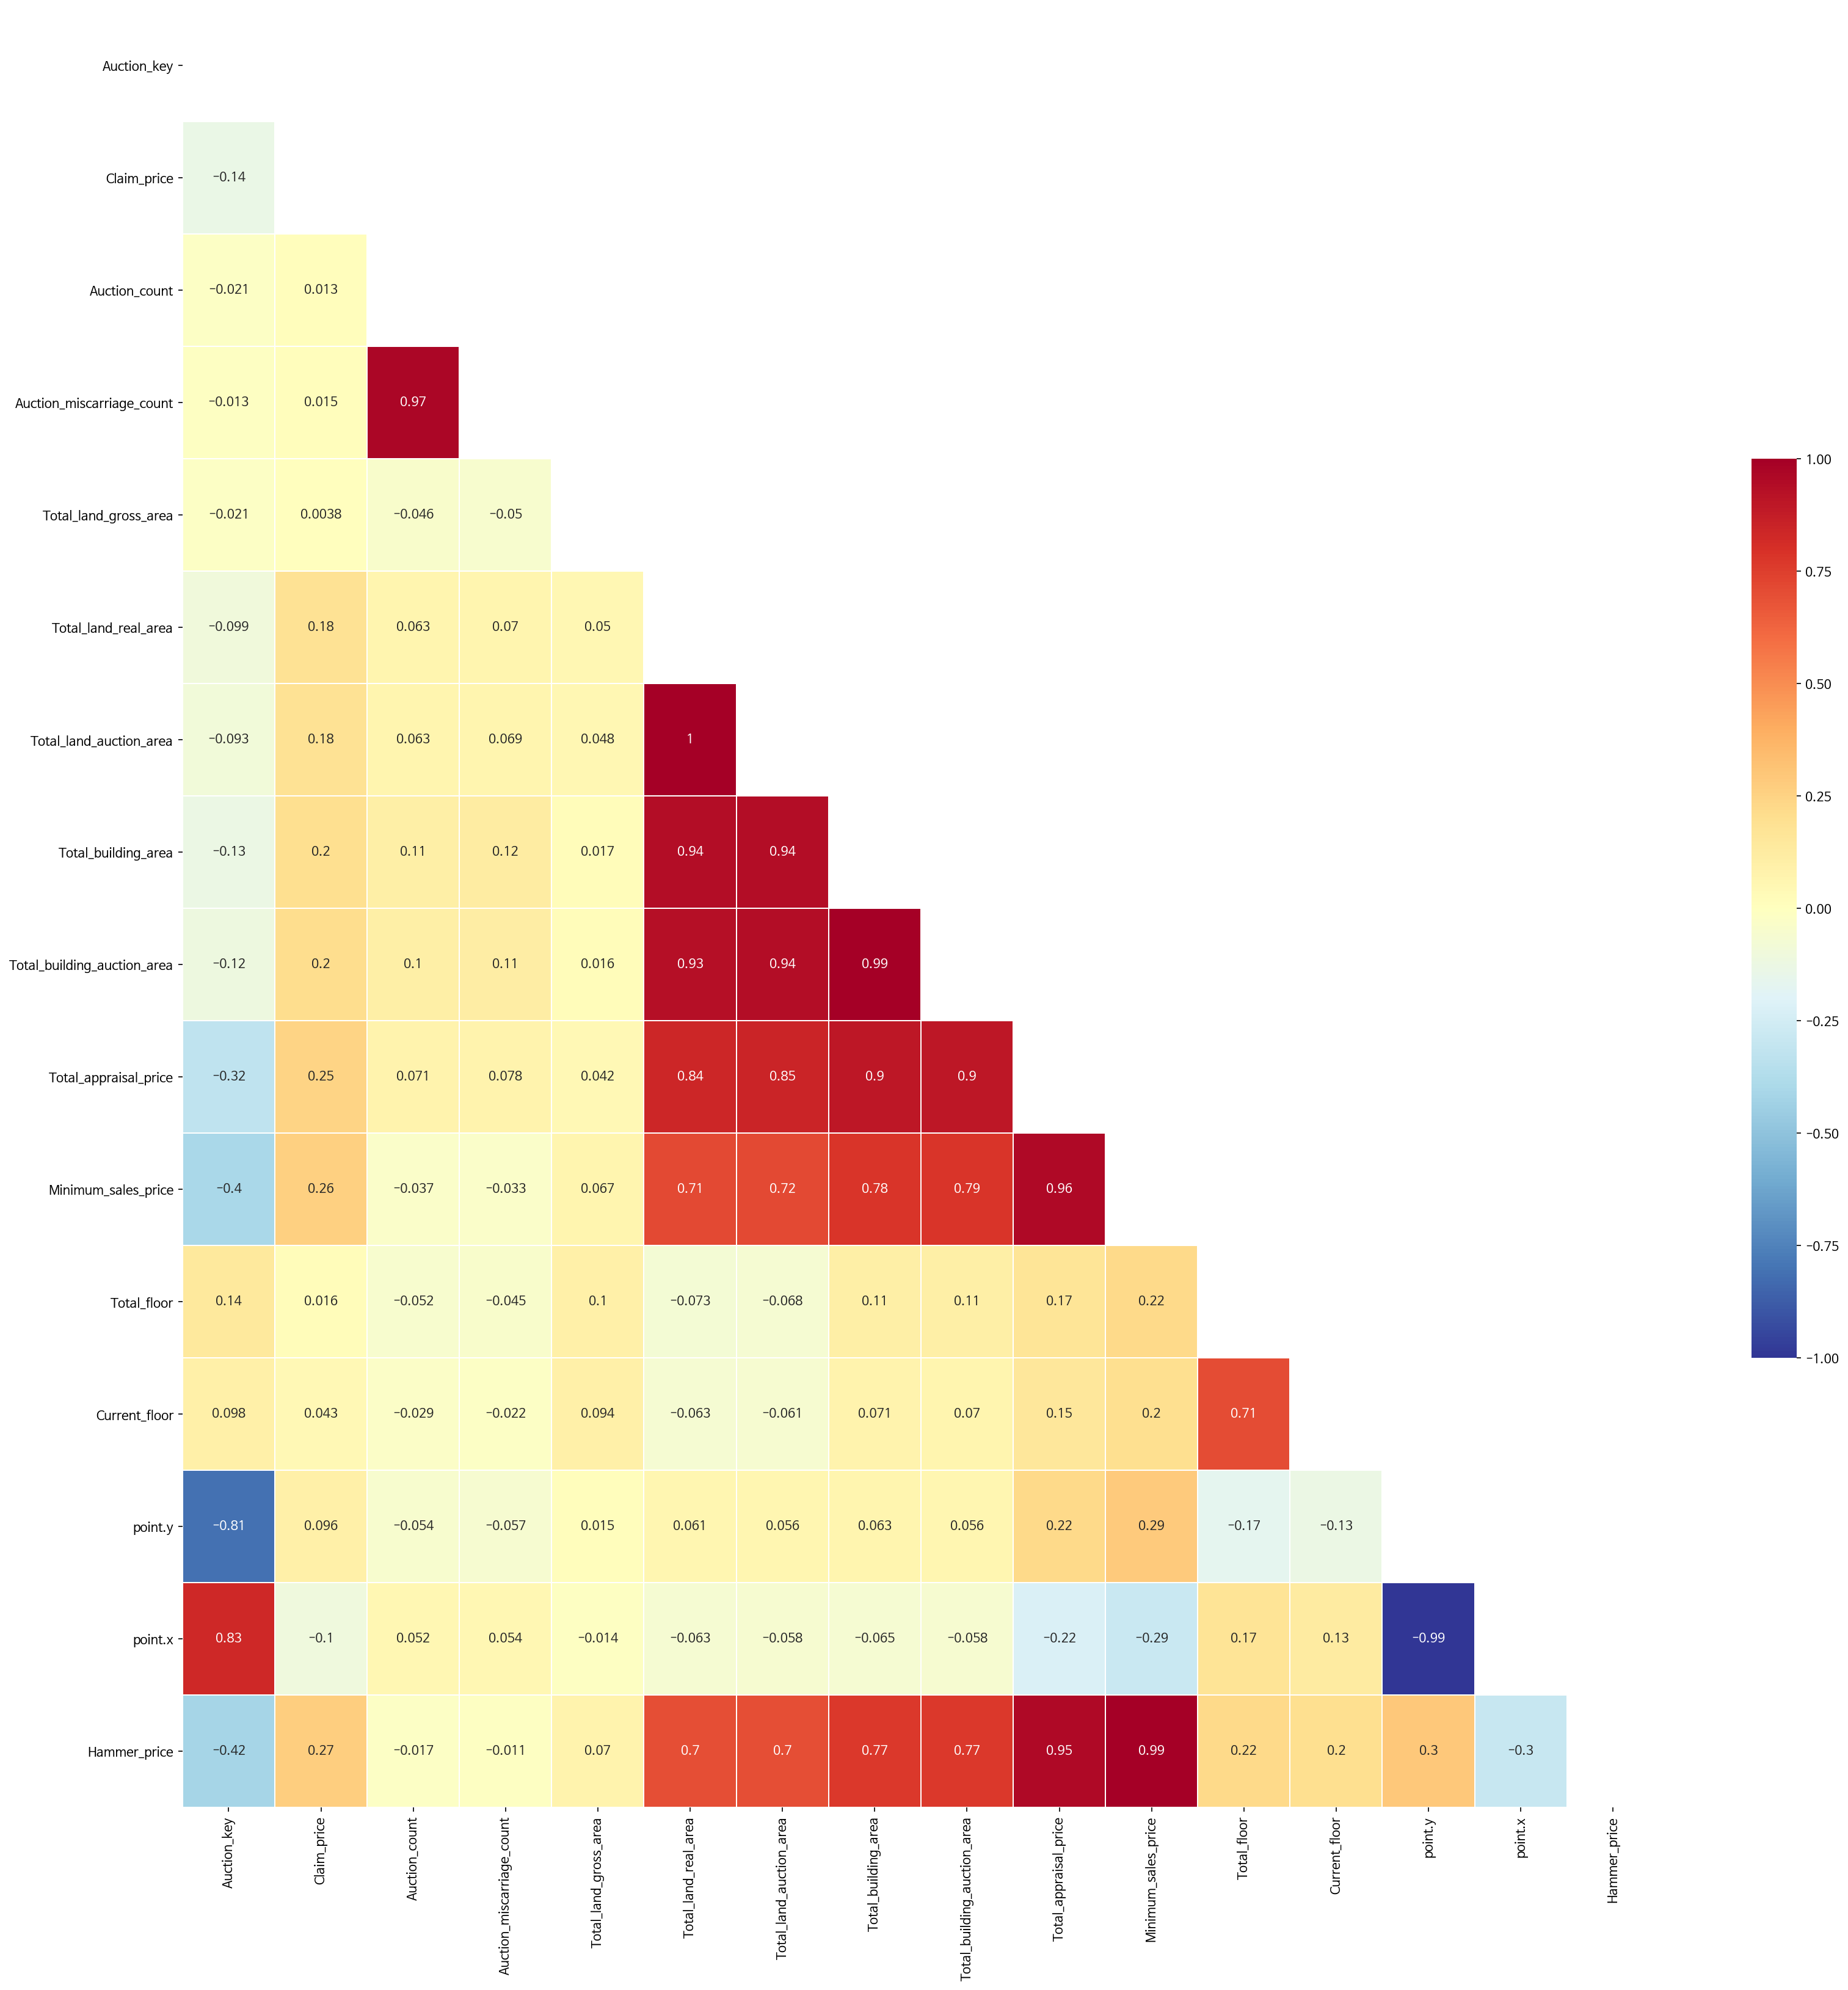

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df = train_auction.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(26,26) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [20]:
feature=['Auction_key','Total_appraisal_price','Total_building_auction_area','Minimum_sales_price',
         'Current_floor','Claim_price','addr_do', 'addr_si','Hammer_price']
train=train_auction[feature]
#train=Auction_master_train
test=test_auction[feature]
#test=Auction_master_test

train

,Auction_key,Total_appraisal_price,Total_building_auction_area,Minimum_sales_price,Current_floor,Claim_price,addr_do,addr_si,Hammer_price
0,2687,836000000,181.77,668800000,5,1766037301,부산,해운대구,760000000
1,2577,1073000000,118.38,858400000,51,152946867,부산,해운대구,971889999
2,2197,119000000,49.94,76160000,14,11326510,부산,사상구,93399999
3,2642,288400000,84.91,230720000,11,183581724,부산,남구,256899000
4,1958,170000000,84.96,136000000,7,45887671,부산,사하구,158660000
...,...,...,...,...,...,...,...,...,...
1928,1567,401000000,84.87,401000000,15,280000000,서울,도봉구,402500000
1929,1295,454000000,114.81,363200000,23,200000000,서울,노원구,430234600
1930,254,1285000000,133.98,1028000000,19,354805459,서울,중구,1118999990
1931,1486,407000000,84.94,325600000,11,80000000,서울,도봉구,403000000


# Hammer_price 이상치제거와 log변환

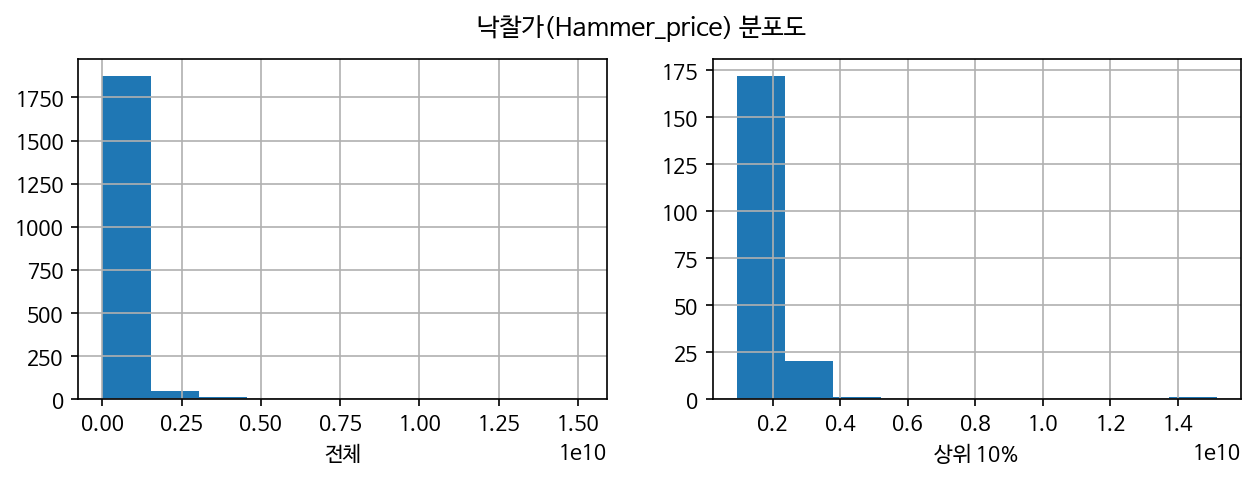

In [21]:
f, ax = plt.subplots(1,2)
ax[0] = plt.subplot(1,2,1)
# 낙찰가(Hammer_price) 전체에 대한 히스토그램
ax[0] = train.Hammer_price.hist(figsize=(10,3))
ax[0].set_xlabel('전체')
ax[1] = plt.subplot(1,2,2)
# 낙찰가(Hammer_price) 상위 10%에 대한 히스토그램
ax[1] = train.sort_values('Hammer_price').iloc[int(train.shape[0]*0.9):].Hammer_price.hist(figsize=(10,3))
ax[1].set_xlabel('상위 10%')
plt.suptitle("낙찰가(Hammer_price) 분포도")
plt.show()

## Hammer_price를 이상치 제거후 log변환하니 정규분포를 보임

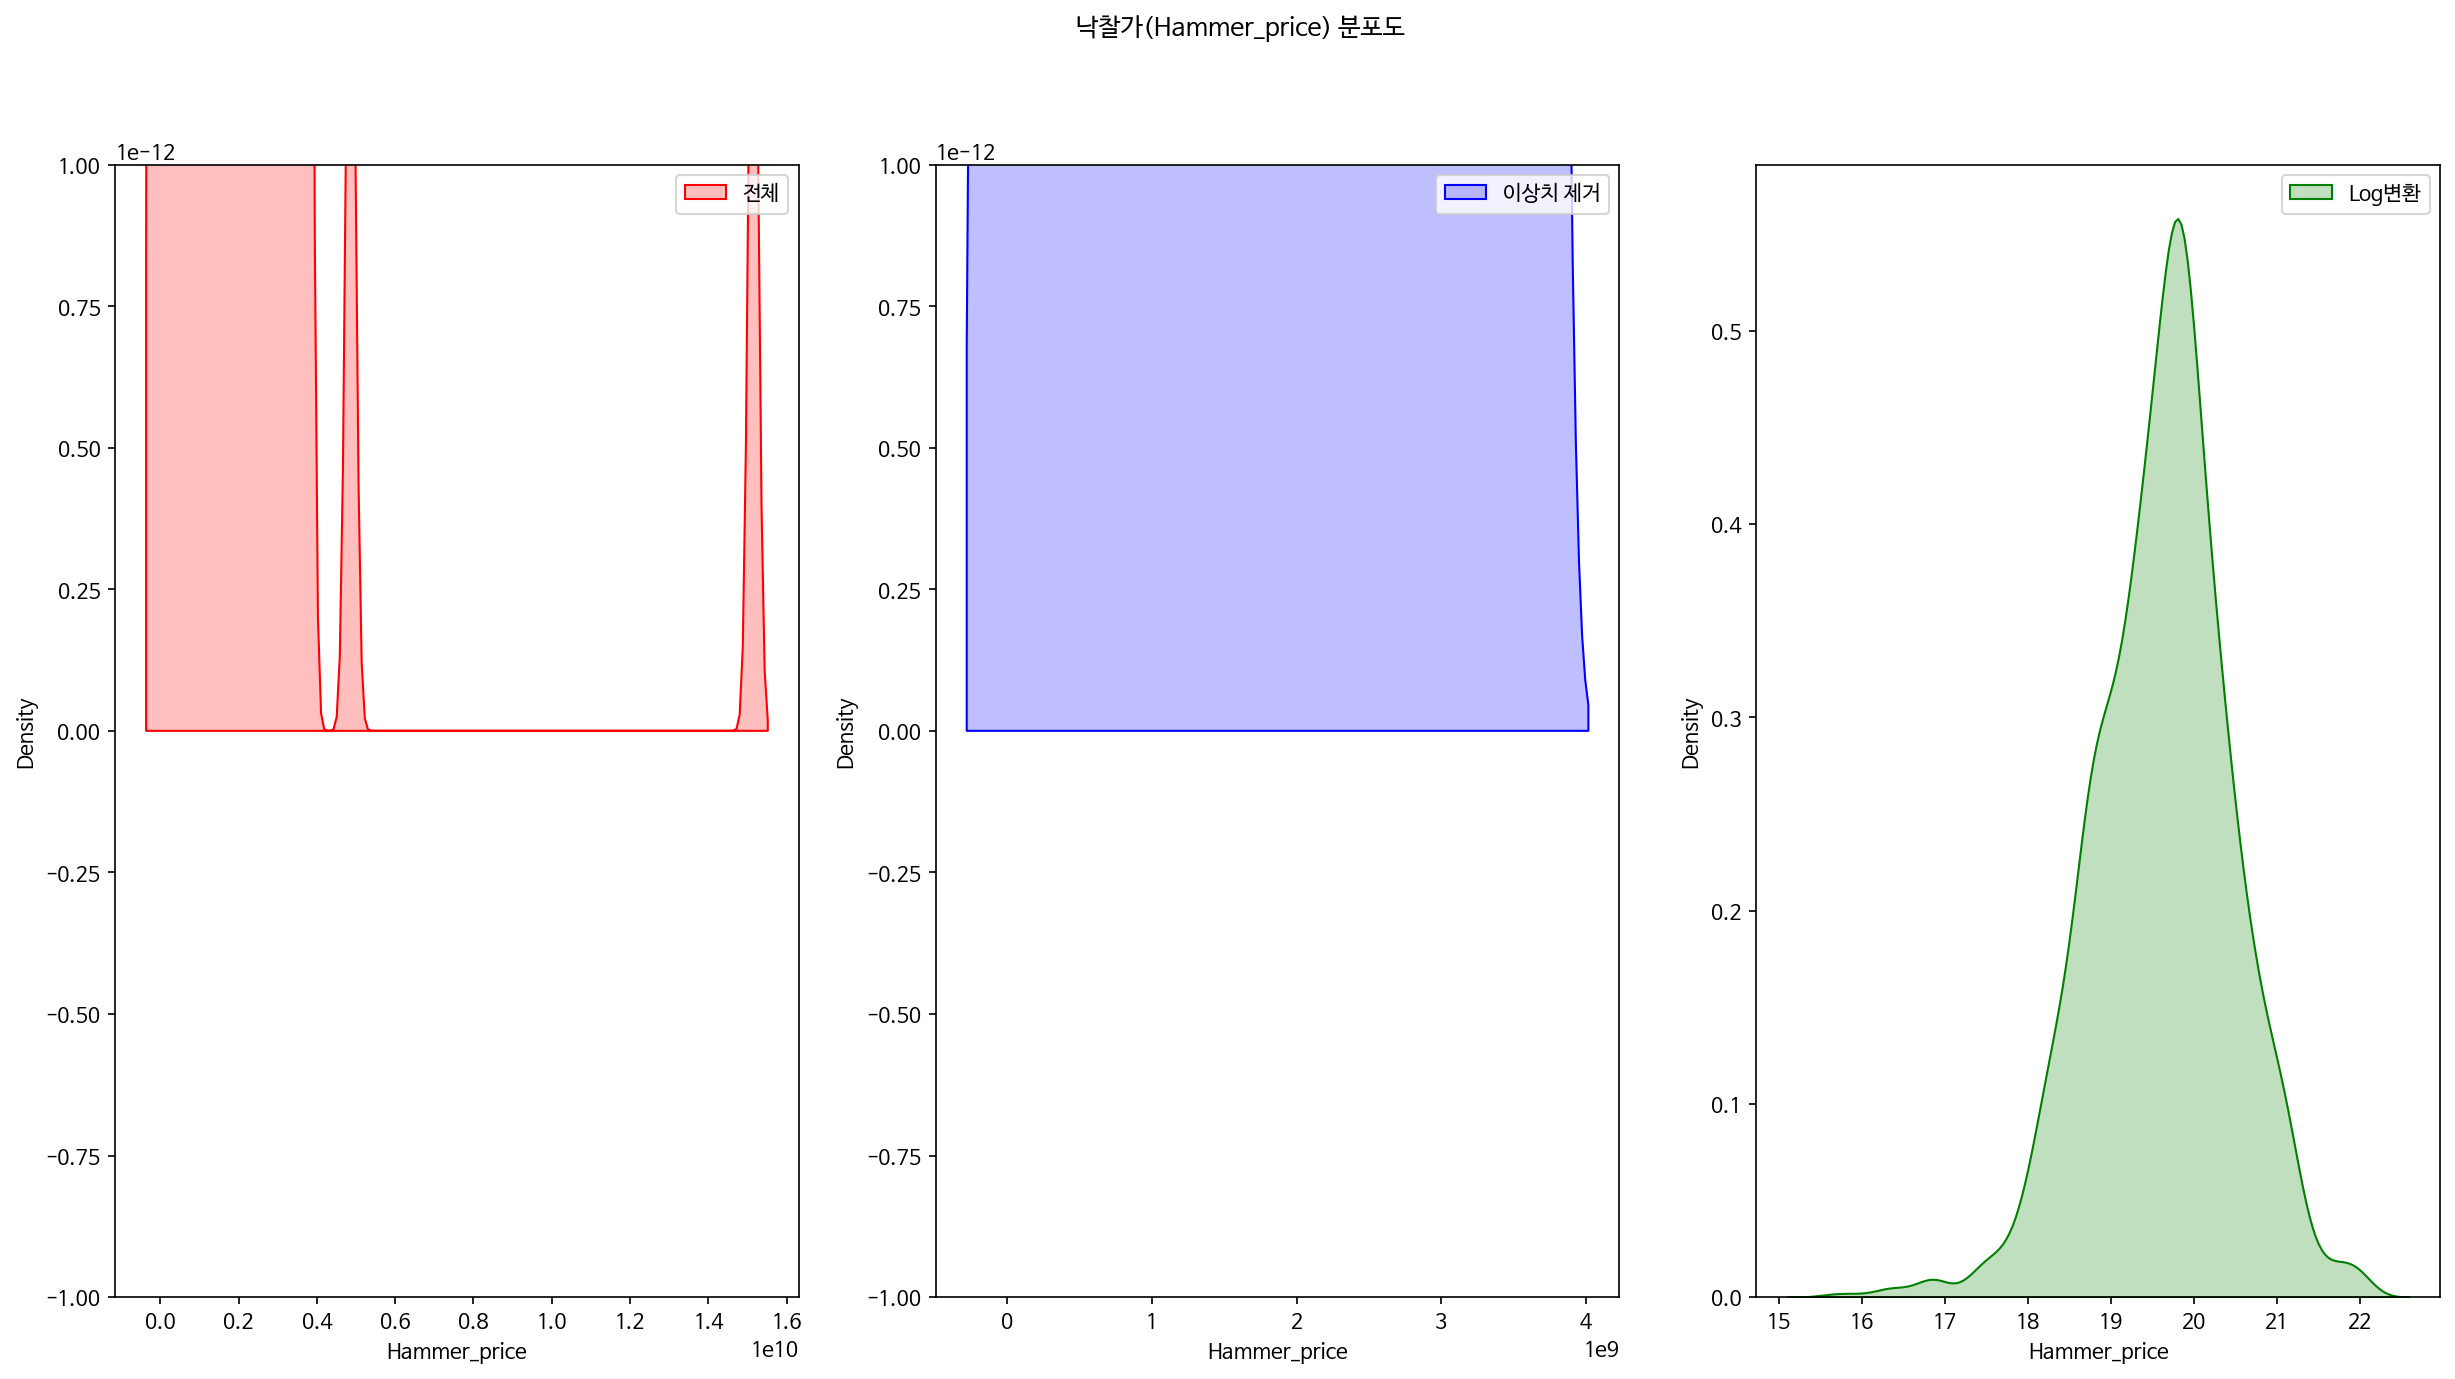

In [91]:
f, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,10))
ax[0] = plt.subplot(1,3,1)
# 낙찰가(Hammer_price) 전체에 대한 KDE Plot
ax[0] = sns.kdeplot(train.Hammer_price,color="red",shade=True)
ax[0].legend(['전체'])
ax[1] = plt.subplot(1,3,2)
# 낙찰가(Hammer_price) 아웃라이어 2개를 제거한 데이터에 대한 KDE Plot
ax[1] = sns.kdeplot(train.sort_values('Hammer_price')[:-2].Hammer_price,color="blue",shade=True)
ax[1].legend(['이상치 제거'])
ax[2] = plt.subplot(1,3,3)
# 낙찰가(Hammer_price) 아웃라이어 2개를 제거한 데이터에 로그 변환 후 KDE Plot
ax[2] = sns.kdeplot(train.sort_values('Hammer_price')[:-2].Hammer_price.transform(np.log),color="green",shade=True)
ax[2].legend(['Log변환'])
plt.suptitle("낙찰가(Hammer_price) 분포도")
plt.show()

In [53]:

train['Hammer_price_log'] = train.Hammer_price.transform(np.log)

#test['Hammer_price_log'] = test.Hammer_price.transform(np.log)

In [54]:
train

,Auction_key,Total_appraisal_price,Total_building_auction_area,Minimum_sales_price,Current_floor,Claim_price,addr_do,addr_si,Hammer_price,Hammer_price_log,Total_appraisal_price_log,Total_building_auction_area_log,HPR,High_price_si,High_HPR_si,Low_HPR_si,Appraisal_price_result,Appraisal_price_result_log
0,2687,836000000,181.77,668800000,5,1766037301,부산,해운대구,760000000,20.448829,20.544139,5.202742,0.909091,True,False,False,836000000,20.544139
1,2577,1073000000,118.38,858400000,51,152946867,부산,해운대구,971889999,20.694753,20.793724,4.773900,0.905769,True,False,False,1073000000,20.793724
2,2197,119000000,49.94,76160000,14,11326510,부산,사상구,93399999,18.352402,18.594634,3.910822,0.784874,False,False,False,119000000,18.594634
3,2642,288400000,84.91,230720000,11,183581724,부산,남구,256899000,19.364194,19.479859,4.441592,0.890773,False,False,False,288400000,19.479859
4,1958,170000000,84.96,136000000,7,45887671,부산,사하구,158660000,18.882274,18.951309,4.442181,0.933294,False,False,False,170000000,18.951309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,401000000,84.87,401000000,15,280000000,서울,도봉구,402500000,19.813206,19.809472,4.441121,1.003741,False,False,False,401000000,19.809472
1929,1295,454000000,114.81,363200000,23,200000000,서울,노원구,430234600,19.879841,19.933608,4.743279,0.947653,False,False,False,454000000,19.933608
1930,254,1285000000,133.98,1028000000,19,354805459,서울,중구,1118999990,20.835701,20.974025,4.897691,0.870817,False,False,True,1285000000,20.974025
1931,1486,407000000,84.94,325600000,11,80000000,서울,도봉구,403000000,19.814447,19.824324,4.441945,0.990172,False,False,False,407000000,19.824324


# 'Total_appraisal_price_log' 도 log 스케일로 바꿔줌

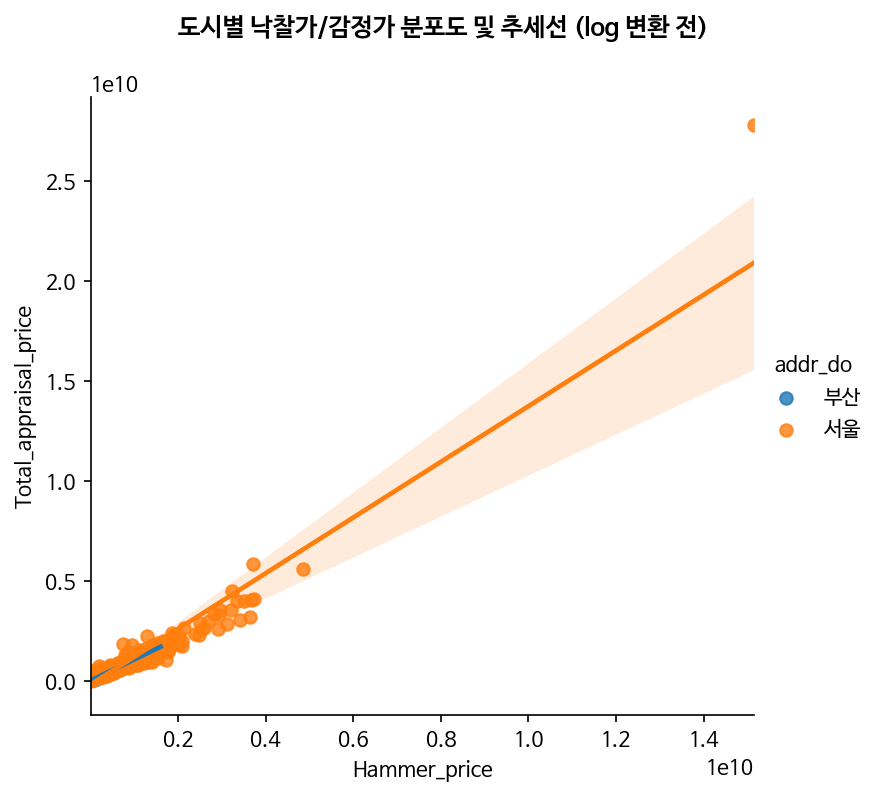

In [25]:
sns.lmplot(x='Hammer_price',y='Total_appraisal_price',hue='addr_do',data=train)
plt.suptitle("도시별 낙찰가/감정가 분포도 및 추세선 (log 변환 전)",x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.show()

In [55]:
train['Total_appraisal_price_log'] = train.Total_appraisal_price.transform(np.log)
test['Total_appraisal_price_log'] = test.Total_appraisal_price.transform(np.log)


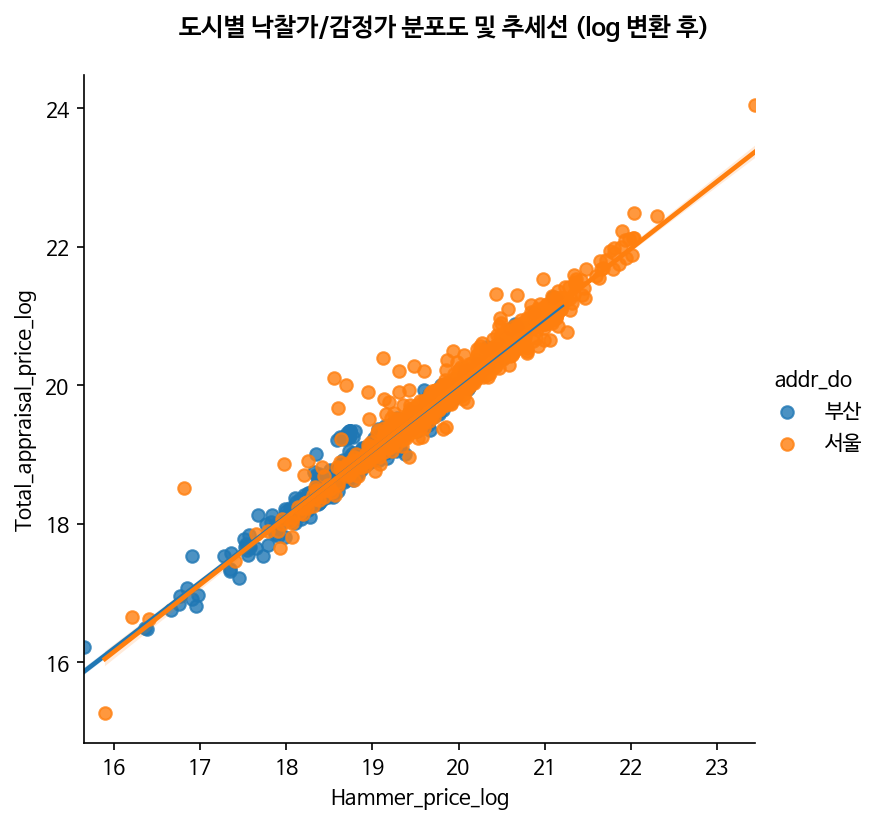

In [56]:
sns.lmplot(x='Hammer_price_log',y='Total_appraisal_price_log',hue='addr_do',data=train)
plt.suptitle("도시별 낙찰가/감정가 분포도 및 추세선 (log 변환 후)",x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.show()

# 'Total_building_auction_area'도 log 스케일로 바꿔서 정규분포로

In [57]:
train['Total_building_auction_area_log'] = train.Total_building_auction_area.transform(np.log)
test['Total_building_auction_area_log'] = test.Total_building_auction_area.transform(np.log)


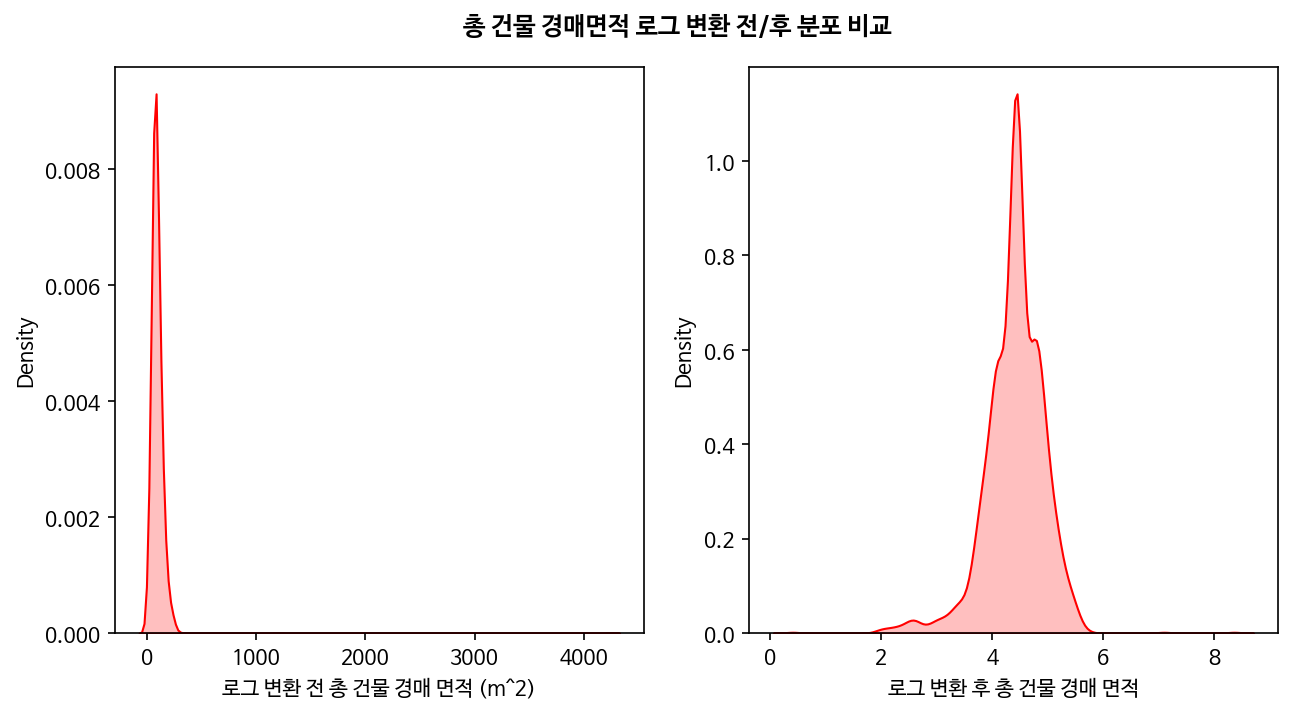

In [58]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(train.Total_building_auction_area,color="red",shade=True, ax=ax1)
ax1.set_xlabel("로그 변환 전 총 건물 경매 면적 (m^2)")
sns.kdeplot(train.Total_building_auction_area_log,color="red",shade=True, ax=ax2)
plt.suptitle("총 건물 경매면적 로그 변환 전/후 분포 비교", x=0.5, y=0.95, ha='center', fontsize='large', fontweight=800)
plt.xlabel("로그 변환 후 총 건물 경매 면적")
plt.show()

# 낙찰가율=Hammer_price/total_appraisal_price
실제 경매에서도 감정가 대비 90% 미만으로 낙찰 받아야 성공적이며 그 이상일 경우에는 감정가보다 높은 집값 상승에 대한 기대가 있다는 뜻이라고 한다.
그러므로 낙찰가율을 구하고 어떤 지역이 감정가 대비 높은 집값 상승이 기대되고 있는지를 시각화를 통해 알아내어 새로운 Feature를 위한 힌트를 얻고자 한다.

In [59]:
train['HPR'] = train.Hammer_price / train.Total_appraisal_price
test['HPR'] = test.Hammer_price / test.Total_appraisal_price


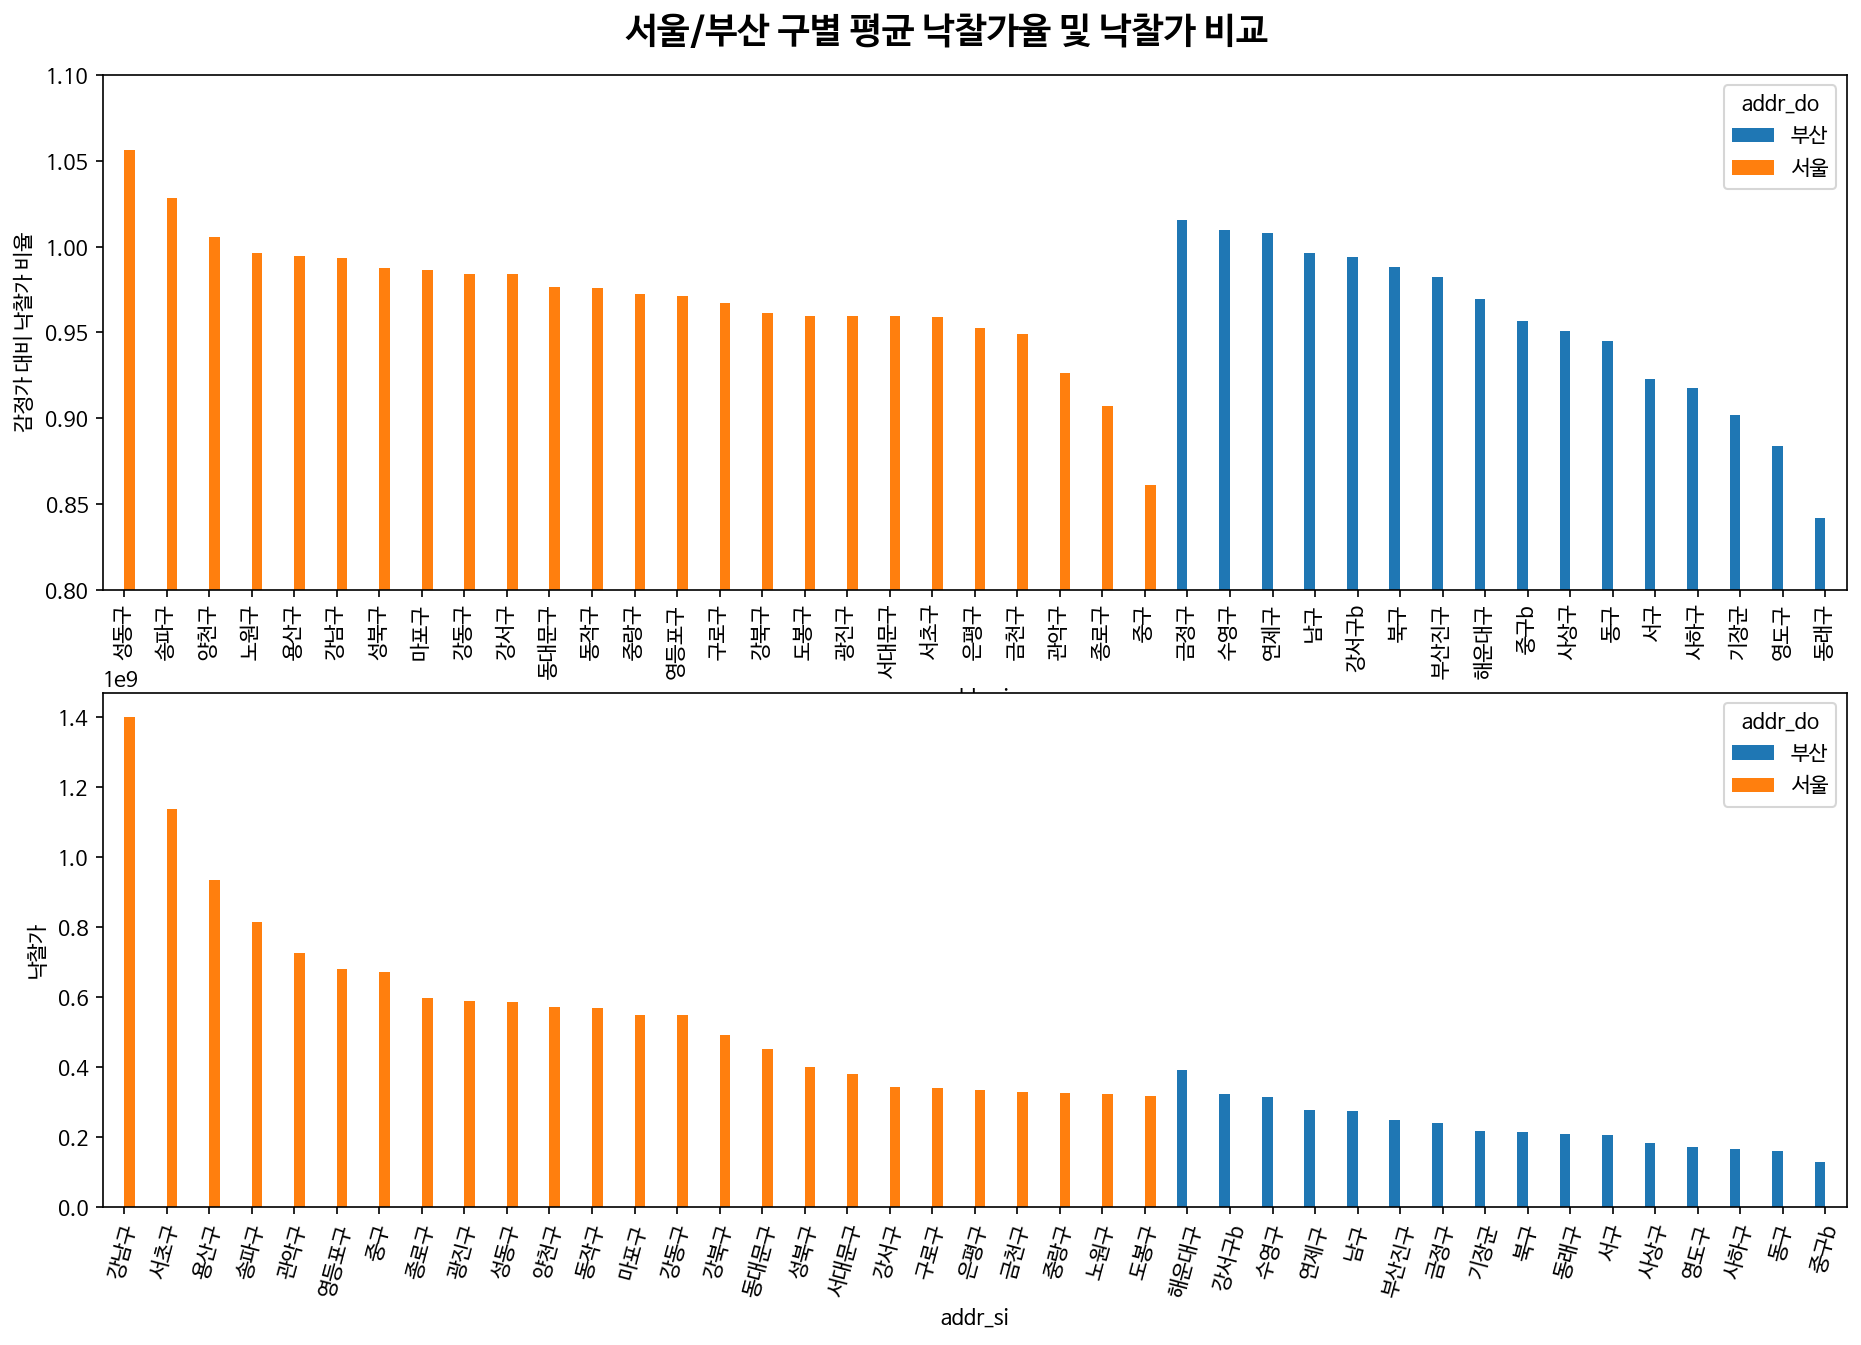

In [60]:
# 서울/부산 구별 평균 낙찰가율 및 낙찰가 비교 그래프 Plotting
f, (ax1, ax2) = plt.subplots(2, figsize=(15,10))
plt.suptitle("서울/부산 구별 평균 낙찰가율 및 낙찰가 비교", x=0.5, y=0.92, ha='center', fontsize='xx-large', fontweight=800)
train.pivot_table('HPR','addr_si','addr_do',aggfunc=np.mean).sort_values(['서울','부산'], ascending=False).plot.bar(ax=ax1, ylim=(0.8,1.1))
plt.xticks(rotation=75)
ax1.set_ylabel("감정가 대비 낙찰가 비율")
train.pivot_table('Hammer_price','addr_si','addr_do',aggfunc=np.mean).sort_values(['서울','부산'], ascending=False).plot.bar(ax=ax2)
plt.xticks(rotation=75)
ax2.set_ylabel("낙찰가")
plt.show()

## High_price_si와 High_HPR_si 생성
*   낙찰가 자체는 서울의 강남, 서초, 용산, 송파 가 압도적으로 우세
*   그러나 '낙찰가율=HPR'은 서울의 '성동구','송파구','양천구' 그리고 부산의 '금정구','수영구','연제구'에서 1.0이 넘는 낙찰가율이 나왔고 이는 이 6개구의 미래 집값 상승에 대한 기대가 크며 경매에서의 경쟁이 치열했음을 알 수 있다.
*   High_price_si와 High_HPR_si란 Bool값을 가진 Feature 생성
*   강서구와 중구에 각각 부산일 경우 뒤에 'b'를 붙이는 것으로 전처리

In [76]:
train['High_price_si'] = train.addr_si.map(lambda x: x in ['강남구','서초구','용산구','송파구','해운대구'])
train['High_HPR_si'] = train.addr_si.map(lambda x: x in ['성동구','송파구','양천구','금정구','수영구','연제구'])

test['High_price_si'] = test.addr_si.map(lambda x: x in ['강남구','서초구','용산구','송파구','해운대구'])
test['High_HPR_si'] = test.addr_si.map(lambda x: x in ['성동구','송파구','양천구','금정구','수영구','연제구'])


In [77]:
train.loc[train.query('addr_do=="부산"&addr_si=="강서구"').index,'addr_si'] = "강서구b"
train.loc[train.query('addr_do=="부산"&addr_si=="중구"').index,'addr_si'] = "중구b"

test.loc[test.query('addr_do=="부산"&addr_si=="강서구"').index,'addr_si'] = "강서구b"
test.loc[test.query('addr_do=="부산"&addr_si=="중구"').index,'addr_si'] = "중구b"

*   낮은 낙찰가율을 보이는 서울 종로구, 중구와 부산 영도구 동래구에 대해
Low_HPR_si란 Bool값을 가진 Feature 생성

In [78]:
train['Low_HPR_si'] = train.addr_si.map(lambda x: x in ['종로구','중구','영도구','동래구'])
test['Low_HPR_si'] = test.addr_si.map(lambda x: x in ['종로구','중구','영도구','동래구'])

In [79]:
train

,Auction_key,Total_appraisal_price,Total_building_auction_area,Minimum_sales_price,Current_floor,Claim_price,addr_do,addr_si,Hammer_price,Hammer_price_log,Total_appraisal_price_log,Total_building_auction_area_log,HPR,High_price_si,High_HPR_si,Low_HPR_si,Appraisal_price_result,Appraisal_price_result_log
0,2687,836000000,181.77,668800000,5,1766037301,부산,해운대구,760000000,20.448829,20.544139,5.202742,0.909091,True,False,False,836000000,20.544139
1,2577,1073000000,118.38,858400000,51,152946867,부산,해운대구,971889999,20.694753,20.793724,4.773900,0.905769,True,False,False,1073000000,20.793724
2,2197,119000000,49.94,76160000,14,11326510,부산,사상구,93399999,18.352402,18.594634,3.910822,0.784874,False,False,False,119000000,18.594634
3,2642,288400000,84.91,230720000,11,183581724,부산,남구,256899000,19.364194,19.479859,4.441592,0.890773,False,False,False,288400000,19.479859
4,1958,170000000,84.96,136000000,7,45887671,부산,사하구,158660000,18.882274,18.951309,4.442181,0.933294,False,False,False,170000000,18.951309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,401000000,84.87,401000000,15,280000000,서울,도봉구,402500000,19.813206,19.809472,4.441121,1.003741,False,False,False,401000000,19.809472
1929,1295,454000000,114.81,363200000,23,200000000,서울,노원구,430234600,19.879841,19.933608,4.743279,0.947653,False,False,False,454000000,19.933608
1930,254,1285000000,133.98,1028000000,19,354805459,서울,중구,1118999990,20.835701,20.974025,4.897691,0.870817,False,False,True,1285000000,20.974025
1931,1486,407000000,84.94,325600000,11,80000000,서울,도봉구,403000000,19.814447,19.824324,4.441945,0.990172,False,False,False,407000000,19.824324


#Auction_result.csv matching 과 log 변환을 통한 정규분포

In [80]:
result=Auction_result.drop_duplicates('Auction_key')
feature_result=['Auction_key','Appraisal_price']
result=result[feature_result]
result

,Auction_key,Appraisal_price
0,1,313000000
7,2,253000000
13,3,106000000
20,4,1600000000
24,5,355000000
...,...,...
8513,2758,240000000
8516,2759,248000000
8519,2760,275000000
8522,2761,315000000


In [81]:
#result data 
def match_result(train,result):

  train['Appraisal_price_result']=0
  #train['Minimum_sales_price_result']=0

  for i in tqdm(range(train.shape[0])):
    train_key=train.iloc[i].Auction_key

    try :
      train_result=result[result.Auction_key==train_key]
    except :
      pass
    train['Appraisal_price_result'][i]=train_result['Appraisal_price']
    #train['Minimum_sales_price_result'][i]=train_result['Minimum_sales_price']
    

  return train




In [82]:
train=match_result(train,result)
test=match_result(test,result)

In [83]:
train['Appraisal_price_result_log'] = train.Appraisal_price_result.transform(np.log)
test['Appraisal_price_result_log'] = test.Appraisal_price_result.transform(np.log)


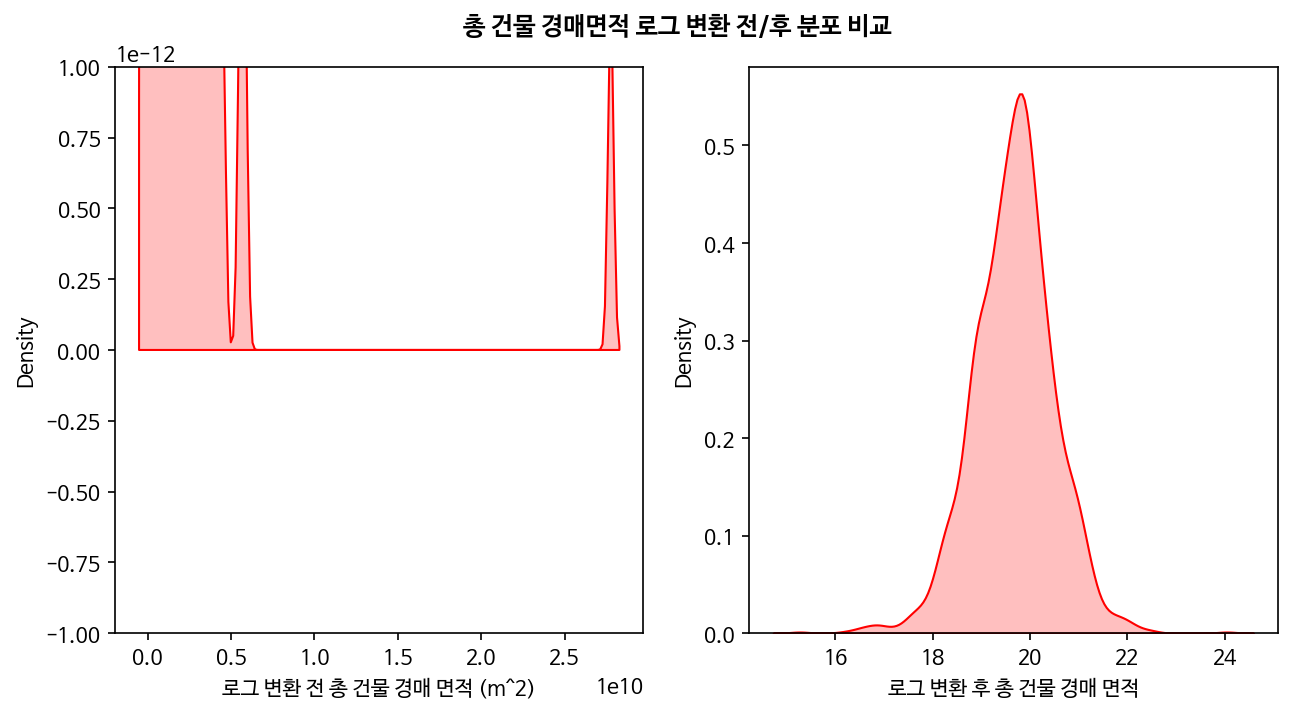

In [84]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(train.Appraisal_price_result,color="red",shade=True, ax=ax1)
ax1.set_xlabel("로그 변환 전 총 건물 경매 면적 (m^2)")
sns.kdeplot(train.Appraisal_price_result_log,color="red",shade=True, ax=ax2)
plt.suptitle("총 건물 경매면적 로그 변환 전/후 분포 비교", x=0.5, y=0.95, ha='center', fontsize='large', fontweight=800)
plt.xlabel("로그 변환 후 총 건물 경매 면적")
plt.show()

In [85]:
train.columns

Index(['Auction_key', 'Total_appraisal_price', 'Total_building_auction_area',
       'Minimum_sales_price', 'Current_floor', 'Claim_price', 'addr_do',
       'addr_si', 'Hammer_price', 'Hammer_price_log',
       'Total_appraisal_price_log', 'Total_building_auction_area_log', 'HPR',
       'High_price_si', 'High_HPR_si', 'Low_HPR_si', 'Appraisal_price_result',
       'Appraisal_price_result_log'],
      dtype='object')

##최종 feature 선택

In [92]:
feature=['Current_floor','Total_appraisal_price_log','Total_building_auction_area_log', 
         'HPR','High_price_si', 'High_HPR_si', 'Low_HPR_si','Appraisal_price_result_log']
y=train['Hammer_price_log']
x_train=train[feature]
x_test=test[feature]

In [95]:
x_train

,Current_floor,Total_appraisal_price_log,Total_building_auction_area_log,HPR,High_price_si,High_HPR_si,Low_HPR_si,Appraisal_price_result_log
0,5,20.544139,5.202742,0.909091,True,False,False,20.544139
1,51,20.793724,4.773900,0.905769,True,False,False,20.793724
2,14,18.594634,3.910822,0.784874,False,False,False,18.594634
3,11,19.479859,4.441592,0.890773,False,False,False,19.479859
4,7,18.951309,4.442181,0.933294,False,False,False,18.951309
...,...,...,...,...,...,...,...,...
1928,15,19.809472,4.441121,1.003741,False,False,False,19.809472
1929,23,19.933608,4.743279,0.947653,False,False,False,19.933608
1930,19,20.974025,4.897691,0.870817,False,False,True,20.974025
1931,11,19.824324,4.441945,0.990172,False,False,False,19.824324


##bool 데이터 처리

In [96]:
x_train['High_price_si']=x_train['High_price_si']*1
x_train['High_HPR_si']=x_train['High_HPR_si']*1
x_train['Low_HPR_si']=x_train['Low_HPR_si']*1
x_train

,Current_floor,Total_appraisal_price_log,Total_building_auction_area_log,HPR,High_price_si,High_HPR_si,Low_HPR_si,Appraisal_price_result_log
0,5,20.544139,5.202742,0.909091,1,0,0,20.544139
1,51,20.793724,4.773900,0.905769,1,0,0,20.793724
2,14,18.594634,3.910822,0.784874,0,0,0,18.594634
3,11,19.479859,4.441592,0.890773,0,0,0,19.479859
4,7,18.951309,4.442181,0.933294,0,0,0,18.951309
...,...,...,...,...,...,...,...,...
1928,15,19.809472,4.441121,1.003741,0,0,0,19.809472
1929,23,19.933608,4.743279,0.947653,0,0,0,19.933608
1930,19,20.974025,4.897691,0.870817,0,0,1,20.974025
1931,11,19.824324,4.441945,0.990172,0,0,0,19.824324


In [98]:
x_test['High_price_si']=x_test['High_price_si']*1
x_test['High_HPR_si']=x_test['High_HPR_si']*1
x_test['Low_HPR_si']=x_test['Low_HPR_si']*1
x_test

,Current_floor,Total_appraisal_price_log,Total_building_auction_area_log,HPR,High_price_si,High_HPR_si,Low_HPR_si,Appraisal_price_result_log
0,5,19.314996,4.675442,0.0,0,0,1,19.275096
1,6,19.248121,4.585783,0.0,0,0,1,19.209138
2,8,19.335234,4.675442,0.0,0,0,1,19.296149
3,9,19.335234,4.675442,0.0,0,0,1,19.296149
4,11,19.335234,4.675442,0.0,0,0,1,19.296149
...,...,...,...,...,...,...,...,...
824,23,19.855765,4.441592,0.0,0,0,0,19.855765
825,3,20.178539,5.015026,0.0,0,0,0,20.178539
826,5,19.495683,3.907412,0.0,0,0,0,19.495683
827,16,20.013989,4.440767,0.0,0,0,0,20.013989


# regist와 rent데이터도 matching => 결측데이터가 많아서 하지 않기로 결정

In [44]:
regist=Auction_regist.drop_duplicates('Auction_key')
feature_regist=['Auction_key','Regist_class'] #Regist_price 거의 0이므로 제거
regist=regist[feature_regist]
regist.info()
print(regist.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 0 to 20696
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Auction_key   2732 non-null   int64 
 1   Regist_class  2732 non-null   object
dtypes: int64(1), object(1)
memory usage: 64.0+ KB
Auction_key     0
Regist_class    0
dtype: int64


In [45]:
encoder=LabelEncoder()
regist_class=encoder.fit_transform(regist['Regist_class'])
regist['Regist_class']=regist_class

In [46]:
regist

,Auction_key,Regist_class
0,1,5
9,2,0
10,3,5
19,4,4
22,5,5
...,...,...
20663,2758,5
20667,2759,5
20677,2760,6
20690,2761,5


In [47]:
#regist data 
def match_regist(train,result):


  train['Regist_class']=np.nan
  for i in tqdm(range(train.shape[0])):
    train_key=train.iloc[i].Auction_key
    try:
      train_regist=regist[regist.Auction_key==train_key]
    except :
      train_regist=np.nan
      pass

    if len(train_regist)>=1:
      train['Regist_class'][i]=train_regist['Regist_class']
      #print(train['Regist_class'][i])
      #print(train_regist)
    else :
      train['Regist_class'][i]=np.nan
    
  return train




In [48]:
train=match_regist(train,regist)
test=match_regist(test,regist)

In [49]:
print("train: ",train.isna().sum())
print("test: ",test.isna().sum())

train:  Auction_key                     0
Auction_class                   0
Claim_price                     0
Total_land_gross_area           0
Total_land_real_area            0
Total_land_auction_area         0
Total_building_area             0
Total_building_auction_area     0
Total_appraisal_price           0
Minimum_sales_price             0
addr_do                         0
addr_si                         0
Apartment_usage                 0
Total_floor                     0
Current_floor                   0
Appraisal_price_result          0
Minimum_sales_price_result      0
Regist_class                   20
dtype: int64
test:  Auction_key                     0
Auction_class                   0
Claim_price                     0
Total_land_gross_area           0
Total_land_real_area            0
Total_land_auction_area         0
Total_building_area             0
Total_building_auction_area     0
Total_appraisal_price           0
Minimum_sales_price             0
addr_do             

In [52]:
rent=Auction_rent.drop_duplicates('Auctiuon_key')
feature_rent=['Auctiuon_key','Rent_deposit','Rent_monthly_price']
rent=rent[feature_rent]
print(rent.isna().sum())
rent.info()

Auctiuon_key          0
Rent_deposit          0
Rent_monthly_price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1555
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Auctiuon_key        1244 non-null   int64
 1   Rent_deposit        1244 non-null   int64
 2   Rent_monthly_price  1244 non-null   int64
dtypes: int64(3)
memory usage: 38.9 KB


In [53]:
rent

,Auctiuon_key,Rent_deposit,Rent_monthly_price
0,1,53000000,250000
1,2,60000000,0
3,3,0,0
5,4,0,0
8,7,50000000,0
...,...,...,...
1548,2745,130000000,0
1549,2749,100000000,0
1553,2754,0,0
1554,2756,0,0


In [54]:
def match_rent(train,rent):

  
  train['Rent_deposit']=np.nan
  train['Rent_monthly_price']=np.nan
  
  for i in tqdm(range(train.shape[0])):
    
    train_key=train.iloc[i].Auction_key

    try:
      train_rent=rent[rent.Auctiuon_key==train_key]
    except :
  
      train_rent=np.nan
      pass
    if len(train_rent)>=1:
        train['Rent_deposit'][i]=train_rent['Rent_deposit']
        train['Rent_monthly_price'][i]=train_rent['Rent_monthly_price']
        #print(train['Rent_deposit'][i])
        #print(train_rent)
    else :
      train['Rent_deposit'][i]=np.nan
      train['Rent_monthly_price'][i]=np.nan

  return train

In [55]:
train=match_rent(train,rent)
test=match_rent(test,rent)

In [56]:
test.isna().sum()

Auction_key                      0
Auction_class                    0
Claim_price                      0
Total_land_gross_area            0
Total_land_real_area             0
Total_land_auction_area          0
Total_building_area              0
Total_building_auction_area      0
Total_appraisal_price            0
Minimum_sales_price              0
addr_do                          0
addr_si                          0
Apartment_usage                  0
Total_floor                      0
Current_floor                    0
Appraisal_price_result           0
Minimum_sales_price_result       0
Regist_class                     0
Rent_deposit                   434
Rent_monthly_price             434
dtype: int64

# train, test 정규화

In [99]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)



In [100]:
print(x_train_std)

[[-0.47471179  1.05887529  1.50828161 ... -0.38541441 -0.2515081
   1.05836385]
 [ 5.24485772  1.36065893  0.70023573 ... -0.38541441 -0.2515081
   1.35987109]
 [ 0.64433442 -1.2983515  -0.92601738 ... -0.38541441 -0.2515081
  -1.29670395]
 ...
 [ 1.26602676  1.57866738  0.93348834 ... -0.38541441  3.97601505
   1.57767986]
 [ 0.27131902  0.18851686  0.07475041 ... -0.38541441 -0.2515081
   0.18880259]
 [-0.22603486  0.92761648  0.43653919 ... -0.38541441 -0.2515081
   0.92722527]]


# PCA

In [102]:
# 고유값, 고유벡터 구하기

scov=np.cov(x_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[2.98914996e+00 1.34849963e+00 7.26449671e-04 2.57543386e-01
 9.42889353e-01 8.97442006e-01 7.72930960e-01 7.94959039e-01]


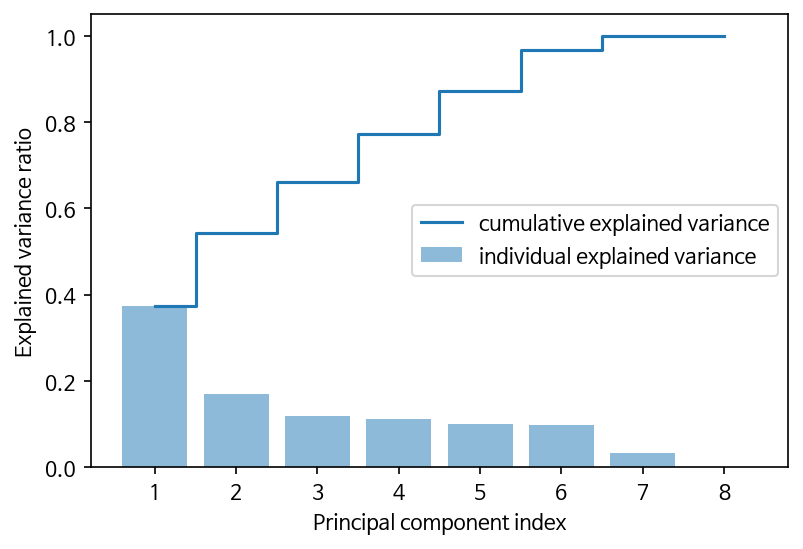

In [104]:
# Explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,9), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [105]:
# PCA를 통해 차원 축소 =>하지는 않음
from sklearn.decomposition import PCA

lpca = PCA(n_components=5)
x_train_pca = lpca.fit_transform(train_std)
x_test_pca = lpca.transform(test_std)


NameError: ignored

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

tree=DecisionTreeRegressor(random_state=1)
randomforest=RandomForestRegressor(random_state=1)

params={'max_depth':[5,7,9],
        'n_estimators':[100,300,500,700]
        }

grid_randomforest=GridSearchCV(estimator=randomforest,
                               param_grid=params,
                               scoring='neg_mean_squared_error',
                               cv=10)

grid_randomforest.fit(x_train_std,y)



GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [55]:
from sklearn.model_selection import cross_val_score # 교차타당도 

scores = cross_val_score(estimator=grid_randomforest,X=x_train_std,y=y,cv=10,scoring='neg_mean_squared_error')
print("ROC AUC: %0.3f (+/- %0.3f)", (scores.mean(), scores.std()))

ROC AUC: %0.3f (+/- %0.3f) (-7.377810032263446e+16, 2.1259163875891267e+17)


In [107]:
grid_randomforest.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [110]:
predict=grid_randomforest.predict(x_test_std)
predict_exp=np.exp(predict)

In [111]:
predict_exp

array([1.33445449e+08, 1.13606059e+08, 1.34295998e+08, 1.34357233e+08,
       1.34430791e+08, 1.34426104e+08, 1.13838755e+08, 1.12747350e+08,
       1.10858237e+08, 1.57886954e+08, 1.09780702e+08, 4.22938354e+07,
       3.50963894e+07, 3.45311824e+07, 1.80122028e+08, 4.35882717e+07,
       1.61861237e+08, 7.34787720e+07, 5.76397884e+07, 1.06850034e+08,
       8.11588364e+07, 2.24285688e+08, 1.04794468e+08, 1.08226755e+08,
       8.02814782e+07, 1.66555776e+08, 7.74307502e+07, 1.53375131e+08,
       1.11065232e+08, 1.41956025e+08, 3.47576181e+07, 3.41575798e+07,
       1.65438642e+08, 5.04853269e+07, 7.66910878e+07, 1.11521444e+08,
       1.54028166e+08, 1.11373739e+08, 1.12950552e+08, 2.25178586e+08,
       4.02424898e+07, 1.67793441e+08, 1.73262944e+08, 1.09704164e+08,
       1.62059593e+08, 1.08973803e+08, 4.49062139e+07, 2.38927024e+08,
       7.71005677e+07, 3.50954528e+07, 2.01041670e+07, 1.12151168e+08,
       1.64759271e+08, 4.56430978e+07, 3.40088222e+07, 7.73451465e+07,
      

In [112]:
Auction_submission['Hammer_price']=predict_exp
Auction_submission.to_csv("result1.csv",index=False)
#70926123.07018	imputer:median

# DNN

In [ ]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
# 학습 파라미터 설정
learning_rate = 0.001
training_epochs = 150
batch_size = 50


In [ ]:
x_train_data=torch.FloatTensor(train_std)
y_train_data=torch.FloatTensor(y)

In [ ]:
train_dataset = torch.utils.data.TensorDataset(x_train_data, y_train_data)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
train_std.shape

(1933, 20)

In [ ]:
linear1 = torch.nn.Linear(20,64,bias=True)
linear2=torch.nn.Linear(64,32,bias=True)
linear3=torch.nn.Linear(32,1,bias=True)

relu=torch.nn.ReLU()

In [ ]:
# Random Init => Xavier Init
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)


Parameter containing:
tensor([[-0.3233, -0.1503,  0.3660,  0.1049, -0.1257,  0.1756, -0.0603,  0.1425,
          0.4072,  0.0553,  0.2472, -0.2554,  0.4119, -0.4085,  0.2550, -0.3980,
          0.1055,  0.3728, -0.2857, -0.1526,  0.0895,  0.4218,  0.2355,  0.0727,
         -0.2179,  0.0582,  0.0203, -0.1185,  0.2760,  0.1588,  0.1278,  0.3832]],
       requires_grad=True)

In [ ]:
# ======================================
# relu는 맨 마지막 레이어에서 빼는 것이 좋다.
# ======================================
model = torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)

In [ ]:
# 손실함수와 최적화 함수
loss = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        X = X.to(device)
        Y = Y.to(device)

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 536798103714398208.000000000
Epoch: 0002 cost = 529921105159258112.000000000
Epoch: 0003 cost = 537391358957060096.000000000
Epoch: 0004 cost = 535346095530704896.000000000
Epoch: 0005 cost = 525422350254997504.000000000
Epoch: 0006 cost = 537898474335633408.000000000
Epoch: 0007 cost = 531137542976700416.000000000
Epoch: 0008 cost = 538738020182917120.000000000
Epoch: 0009 cost = 538901332019380224.000000000
Epoch: 0010 cost = 539943978280157184.000000000
Epoch: 0011 cost = 533789152706035712.000000000
Epoch: 0012 cost = 533947791618080768.000000000
Epoch: 0013 cost = 531518867353108480.000000000
Epoch: 0014 cost = 538743277222887424.000000000
Epoch: 0015 cost = 538217401427165184.000000000
Epoch: 0016 cost = 535392618616455168.000000000
Epoch: 0017 cost = 537989252764401664.000000000
Epoch: 0018 cost = 537405515169267712.000000000
Epoch: 0019 cost = 534559257522077696.000000000
Epoch: 0020 cost = 540907322264780800.000000000
Epoch: 0021 cost = 526344153315934208.00

In [ ]:
# Test the model using test sets
with torch.no_grad():

  #x_test_data=test_std.loc[:,:]
  x_test_data=np.array(test_std)
  #x_test_data = Scaler.transform(x_test_data)
  x_test_data=torch.from_numpy(x_test_data).float().to(device)

  prediction = model(x_test_data)

In [ ]:
correct_prediction = prediction.cpu().numpy().reshape(-1,1)

In [ ]:
correct_prediction

array([[ 2289748.5 ],
       [ 2317877.2 ],
       [ 2215360.  ],
       [ 2241285.2 ],
       [ 2220806.5 ],
       [ 2210567.  ],
       [ 2244161.5 ],
       [ 2323467.  ],
       [ 2805650.  ],
       [ 1544887.1 ],
       [ 2675926.8 ],
       [ 3771943.2 ],
       [ 3994434.5 ],
       [ 3723731.2 ],
       [  979570.6 ],
       [ 4154798.2 ],
       [  685801.94],
       [ 2660960.  ],
       [ 2215883.2 ],
       [ 2992826.  ],
       [ 3167416.2 ],
       [  591927.06],
       [ 1787227.  ],
       [ 1867436.5 ],
       [ 1916025.9 ],
       [ 1740998.6 ],
       [ 3267457.2 ],
       [ 1687862.  ],
       [ 3255861.8 ],
       [ 2047155.6 ],
       [ 3468149.  ],
       [ 3561301.  ],
       [ 1171190.1 ],
       [ 3635070.  ],
       [ 3065010.8 ],
       [ 3414977.8 ],
       [ 2547861.  ],
       [ 2034401.9 ],
       [ 3014186.2 ],
       [ 1035386.56],
       [ 4203347.  ],
       [ 1890167.  ],
       [ 1743859.4 ],
       [ 2434195.2 ],
       [ 1761213.1 ],
       [ 3

In [ ]:
for i in range(len(correct_prediction)):
  Auction_submission['Hammer_price'][i]=correct_prediction[i].item()
Auction_submission

,Auction_key,Hammer_price
0,1778,2289748.500
1,1779,2317877.250
2,1784,2215360.000
3,1786,2241285.250
4,1790,2220806.500
...,...,...
824,1762,566954.125
825,1767,944909.000
826,1770,2704939.000
827,1772,582341.625


In [ ]:
Auction_submission.to_csv('result_dnn1.csv',index=False)